In [1]:
import pandas as pd

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Print the unique encoded locations
unique_encoded_locations = data[['location', 'location_encoded']].drop_duplicates().sort_values(by='location_encoded')
print("Unique Encoded Locations:")
print(unique_encoded_locations)

# Now you can continue with further processing or analysis on the 'data' DataFrame
# For example, you can save the modified DataFrame back to a CSV file if needed:
# data.to_csv('Modified_Group2_Ready.csv', index=False)


Unique Encoded Locations:
                location  location_encoded
0              Hampshire                 1
1     Greater Manchester                 2
2         West Yorkshire                 3
3         Greater London                 4
6                  Essex                 5
7        North Yorkshire                 6
12                  Kent                 7
13            Merseyside                 8
14         Hertfordshire                 9
23            Lancashire                10
26                Surrey                11
36         West Midlands                12
43       South Yorkshire                13
61                 Devon                14
180        Tyne and Wear                15
917        Staffordshire                16
2491     Nottinghamshire                17


C:\Users\cg\AppData\Local\Temp\ipykernel_24564\1248757603.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


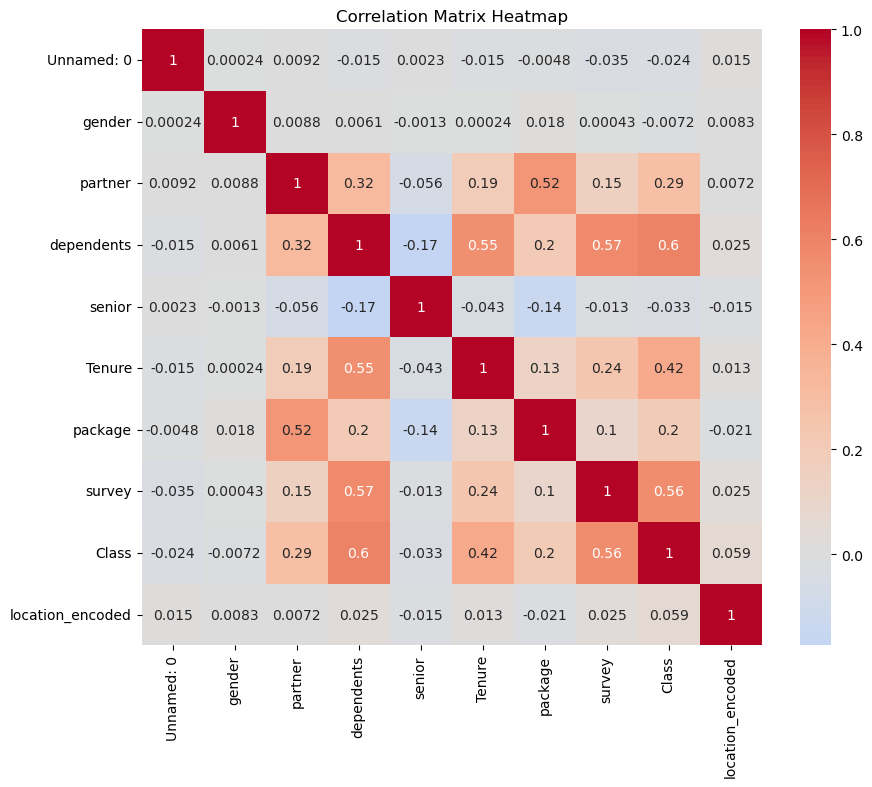

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [15]:
data['gender']

0       1
1       1
2       0
3       1
4       1
       ..
7345    0
7346    1
7347    1
7348    0
7349    1
Name: gender, Length: 7350, dtype: int64

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       423
           1       0.90      0.93      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



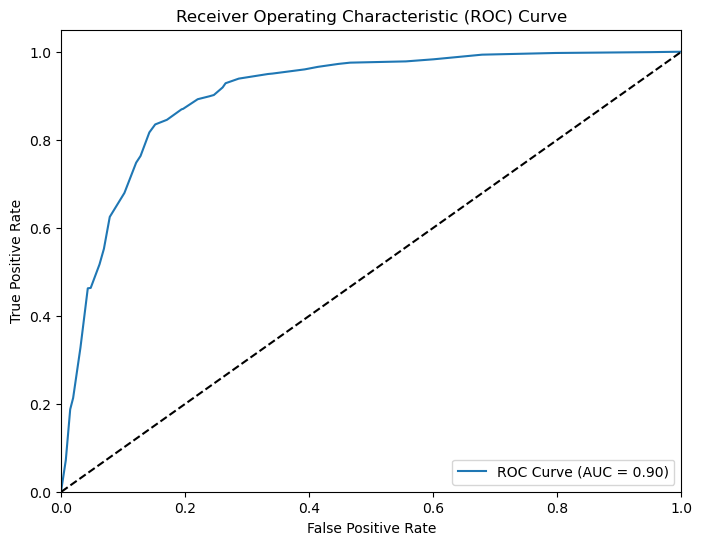

Index 19: Predicted Class = 1
Index 271: Predicted Class = 1
Index 523: Predicted Class = 1
Index 756: Predicted Class = 1
Index 905: Predicted Class = 1
Index 968: Predicted Class = 1
Index 1257: Predicted Class = 1
Index 1466: Predicted Class = 1
Index 1641: Predicted Class = 1
Index 1861: Predicted Class = 1
Index 2106: Predicted Class = 1
Index 2152: Predicted Class = 1
Index 2182: Predicted Class = 1
Index 2335: Predicted Class = 1
Index 2339: Predicted Class = 1
Index 2604: Predicted Class = 1
Index 2923: Predicted Class = 1
Index 3097: Predicted Class = 0
Index 3131: Predicted Class = 1
Index 3379: Predicted Class = 1
Index 3522: Predicted Class = 1
Index 4022: Predicted Class = 1
Index 4159: Predicted Class = 1
Index 4695: Predicted Class = 1
Index 4781: Predicted Class = 1
Index 4876: Predicted Class = 1
Index 4907: Predicted Class = 1
Index 5031: Predicted Class = 1
Index 5283: Predicted Class = 1
Index 5363: Predicted Class = 1
Index 5626: Predicted Class = 1
Index 5640: Pre

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents', ]
target = 'Class'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
prediction_values = clf.predict(X.iloc[values])
for index, value in zip(values, prediction_values):
    print(f"Index {index}: Predicted Class = {value}")


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71       423
           1       0.87      0.91      0.89      1047

    accuracy                           0.84      1470
   macro avg       0.81      0.79      0.80      1470
weighted avg       0.84      0.84      0.84      1470



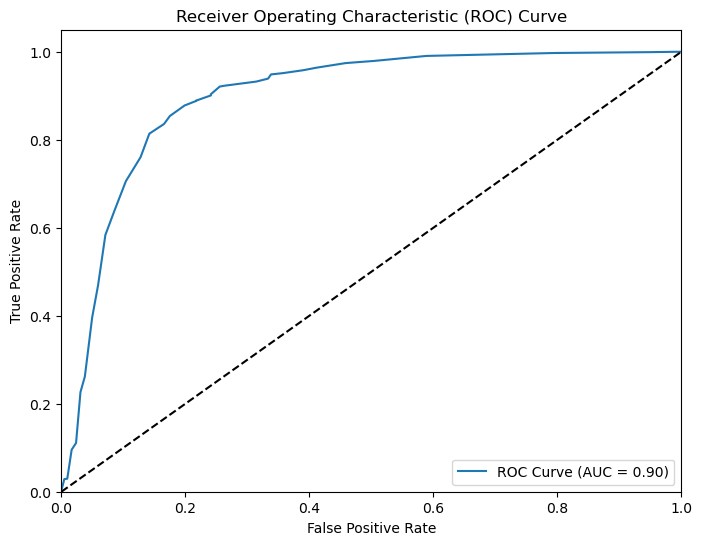

Index 19: Predicted Class = 1
Index 271: Predicted Class = 1
Index 523: Predicted Class = 1
Index 756: Predicted Class = 1
Index 905: Predicted Class = 1
Index 968: Predicted Class = 0
Index 1257: Predicted Class = 1
Index 1466: Predicted Class = 1
Index 1641: Predicted Class = 1
Index 1861: Predicted Class = 1
Index 2106: Predicted Class = 1
Index 2152: Predicted Class = 1
Index 2182: Predicted Class = 1
Index 2335: Predicted Class = 1
Index 2339: Predicted Class = 1
Index 2604: Predicted Class = 1
Index 2923: Predicted Class = 1
Index 3097: Predicted Class = 0
Index 3131: Predicted Class = 1
Index 3379: Predicted Class = 1
Index 3522: Predicted Class = 1
Index 4022: Predicted Class = 1
Index 4159: Predicted Class = 1
Index 4695: Predicted Class = 1
Index 4781: Predicted Class = 1
Index 4876: Predicted Class = 1
Index 4907: Predicted Class = 1
Index 5031: Predicted Class = 1
Index 5283: Predicted Class = 1
Index 5363: Predicted Class = 1
Index 5626: Predicted Class = 1
Index 5640: Pre

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey']
target = 'Class'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)
prediction_values = clf.predict(X.iloc[values])
for index, value in zip(values, prediction_values):
    print(f"Index {index}: Predicted Class = {value}")

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       423
           1       0.90      0.92      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



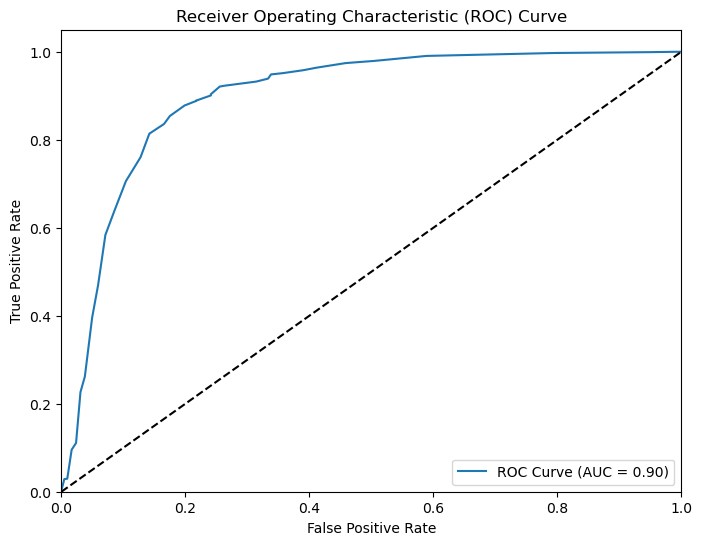

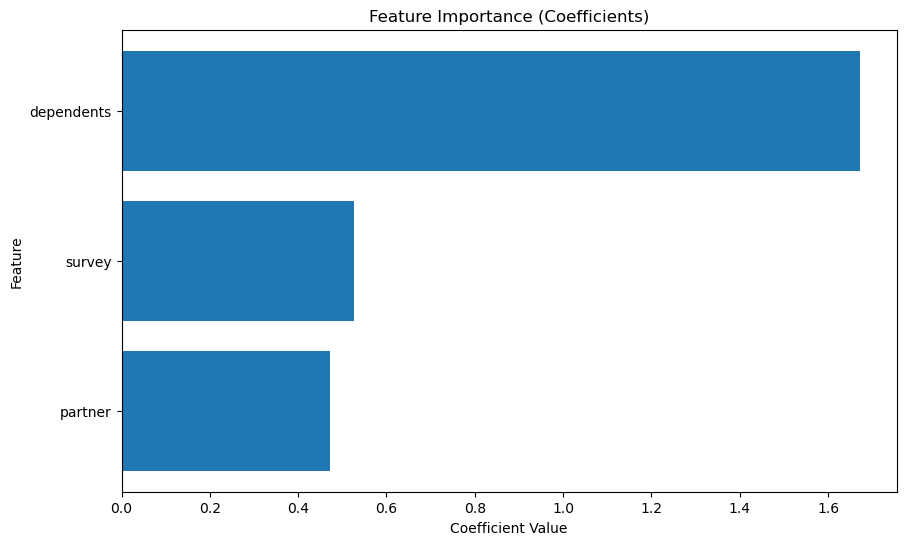

Index 19: Predicted Class = 1
Index 271: Predicted Class = 1
Index 523: Predicted Class = 1
Index 756: Predicted Class = 1
Index 905: Predicted Class = 1
Index 968: Predicted Class = 1
Index 1257: Predicted Class = 1
Index 1466: Predicted Class = 1
Index 1641: Predicted Class = 1
Index 1861: Predicted Class = 1
Index 2106: Predicted Class = 1
Index 2152: Predicted Class = 1
Index 2182: Predicted Class = 1
Index 2335: Predicted Class = 1
Index 2339: Predicted Class = 1
Index 2604: Predicted Class = 1
Index 2923: Predicted Class = 1
Index 3097: Predicted Class = 0
Index 3131: Predicted Class = 1
Index 3379: Predicted Class = 1
Index 3522: Predicted Class = 1
Index 4022: Predicted Class = 1
Index 4159: Predicted Class = 1
Index 4695: Predicted Class = 1
Index 4781: Predicted Class = 1
Index 4876: Predicted Class = 1
Index 4907: Predicted Class = 1
Index 5031: Predicted Class = 1
Index 5283: Predicted Class = 1
Index 5363: Predicted Class = 1
Index 5626: Predicted Class = 1
Index 5640: Pre

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents', 'partner']
target = 'Class'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
clf = LogisticRegression(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
coefs = clf.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefs)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Coefficients)")
plt.show()

clf = LogisticRegression(random_state=42)
clf.fit(X, y)
prediction_values = clf.predict(X.iloc[values])
for index, value in zip(values, prediction_values):
    print(f"Index {index}: Predicted Class = {value}")

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       423
           1       0.88      0.94      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.86      0.82      0.83      1470
weighted avg       0.87      0.87      0.87      1470



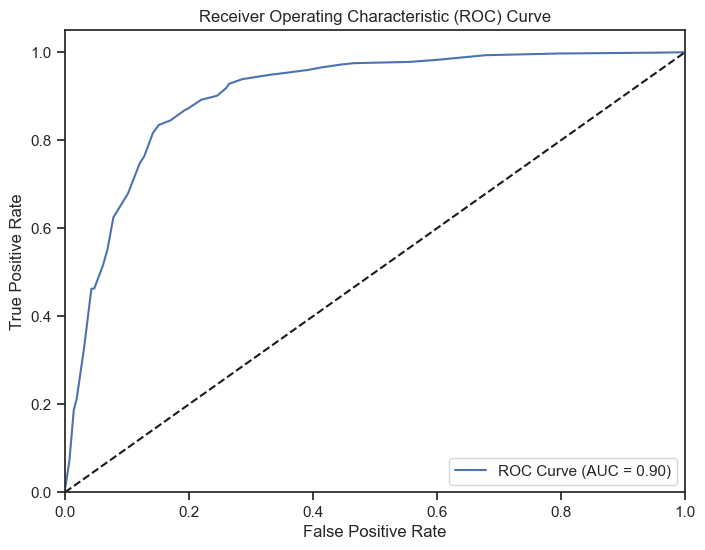

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents']
target = 'Class'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) classifier
clf = SVC(random_state=42, C=2.0)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents']
target = 'Class'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-Nearest Neighbors (k-NN) classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76       423
           1       0.92      0.87      0.89      1047

    accuracy                           0.85      1470
   macro avg       0.82      0.84      0.83      1470
weighted avg       0.86      0.85      0.85      1470



NameError: name 'roc_auc_score' is not defined

<Figure size 800x600 with 0 Axes>

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents']
target = 'Class'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       423
           1       0.90      0.93      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents']
target = 'Class'

X = data[features].values
y = data[target].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define a simple neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Instantiate the model
model = Net()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

# Make predictions
with torch.no_grad():
    y_pred = (model(X_test) > 0.5).float()

# Convert predictions and targets back to numpy arrays
y_pred = y_pred.numpy()
y_test = y_test.numpy()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.70      0.75       423
         1.0       0.89      0.94      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.82      0.83      1470
weighted avg       0.87      0.87      0.86      1470



Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.86      0.74       423
         1.0       0.93      0.82      0.87      1047

    accuracy                           0.83      1470
   macro avg       0.79      0.84      0.81      1470
weighted avg       0.85      0.83      0.83      1470



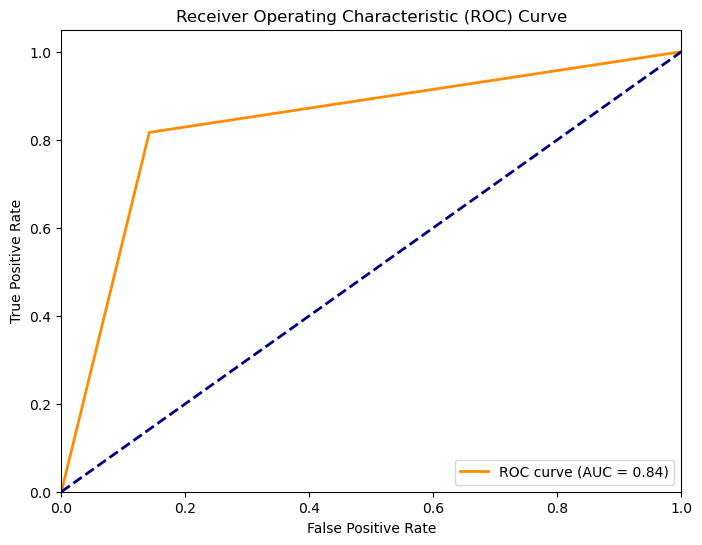

Index 19: Predicted Class = 1
Index 271: Predicted Class = 1
Index 523: Predicted Class = 1
Index 756: Predicted Class = 1
Index 905: Predicted Class = 1
Index 968: Predicted Class = 0
Index 1257: Predicted Class = 1
Index 1466: Predicted Class = 1
Index 1641: Predicted Class = 1
Index 1861: Predicted Class = 1
Index 2106: Predicted Class = 1
Index 2152: Predicted Class = 1
Index 2182: Predicted Class = 1
Index 2335: Predicted Class = 1
Index 2339: Predicted Class = 1
Index 2604: Predicted Class = 1
Index 2923: Predicted Class = 1
Index 3097: Predicted Class = 0
Index 3131: Predicted Class = 1
Index 3379: Predicted Class = 0
Index 3522: Predicted Class = 1
Index 4022: Predicted Class = 1
Index 4159: Predicted Class = 1
Index 4695: Predicted Class = 1
Index 4781: Predicted Class = 1
Index 4876: Predicted Class = 1
Index 4907: Predicted Class = 1
Index 5031: Predicted Class = 1
Index 5283: Predicted Class = 1
Index 5363: Predicted Class = 1
Index 5626: Predicted Class = 1
Index 5640: Pre

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents']
target = 'Class'

X = data[features].values
y = data[target].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define hyperparameters
learning_rate = 0.1
num_epochs = 200
batch_size = 64
hidden_units = [8, 4, 2]  # Number of units in each hidden layer

# Define a deep neural network model
class DeepModel(nn.Module):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], hidden_units[0])
        self.fc2 = nn.Linear(hidden_units[0], hidden_units[1])
        self.fc3 = nn.Linear(hidden_units[1], hidden_units[2])
        self.fc4 = nn.Linear(hidden_units[2], 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Instantiate the model
model = DeepModel()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

# Make predictions
with torch.no_grad():
    y_pred = (model(X_test) > 0.8).float()

# Convert predictions and targets back to numpy arrays
y_pred = y_pred.numpy()
y_test = y_test.numpy()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Load the trained model's state_dict if available
# model.load_state_dict(torch.load('path_to_your_trained_model.pth'))

# Set the model to evaluation mode
model.eval()

# Predict values for the specified indexes
with torch.no_grad():
    prediction_values = model(X_tensor[values]).numpy()

# Convert predicted values to binary labels (0 or 1)
prediction_labels = (prediction_values >= 0.8).astype(int)

# Print the predicted labels for each index
for index, value in zip(values, prediction_labels):
    print(f"Index {index}: Predicted Class = {value[0]}")


In [17]:
data['Class'][19]

0

Training and evaluating Decision Tree...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       423
           1       0.90      0.93      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



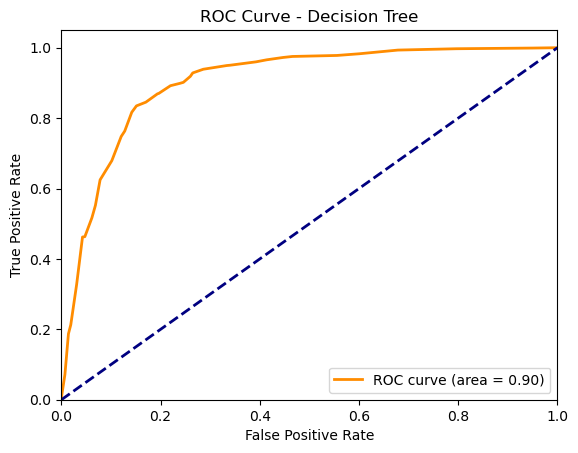

--------------------------------------------------

Training and evaluating Random Forest...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       423
           1       0.90      0.93      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



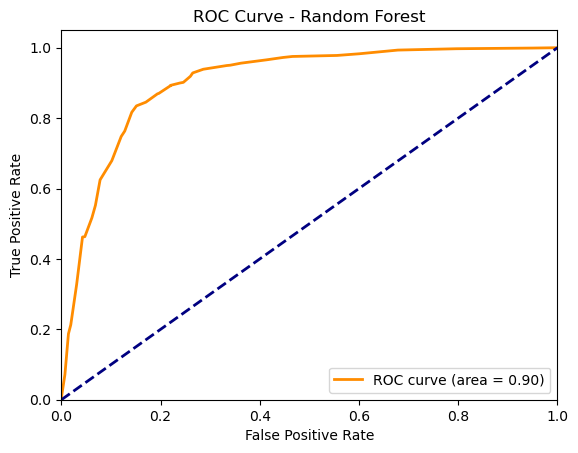

--------------------------------------------------

Training and evaluating Logistic Regression...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       423
           1       0.90      0.92      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.83      0.84      1470
weighted avg       0.87      0.87      0.87      1470



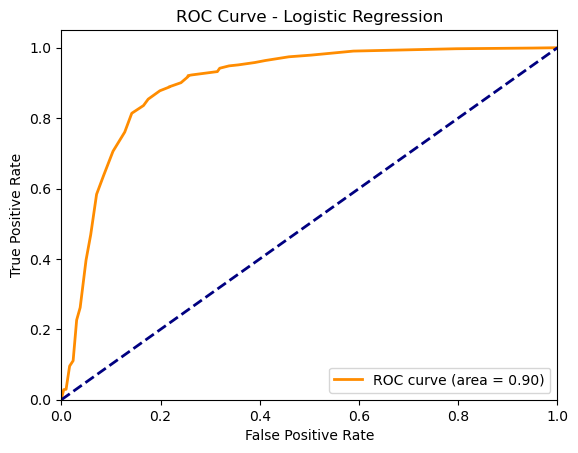

--------------------------------------------------

Training and evaluating Support Vector Machine...
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       423
           1       0.91      0.92      0.91      1047

    accuracy                           0.87      1470
   macro avg       0.85      0.84      0.84      1470
weighted avg       0.87      0.87      0.87      1470



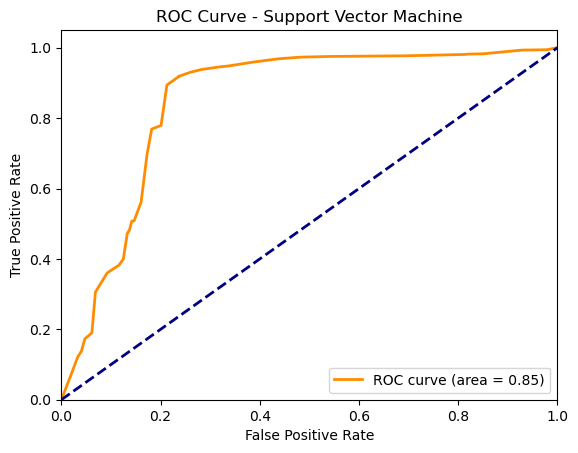

--------------------------------------------------

Training and evaluating k-Nearest Neighbors...
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       423
           1       0.91      0.87      0.89      1047

    accuracy                           0.85      1470
   macro avg       0.81      0.83      0.82      1470
weighted avg       0.85      0.85      0.85      1470



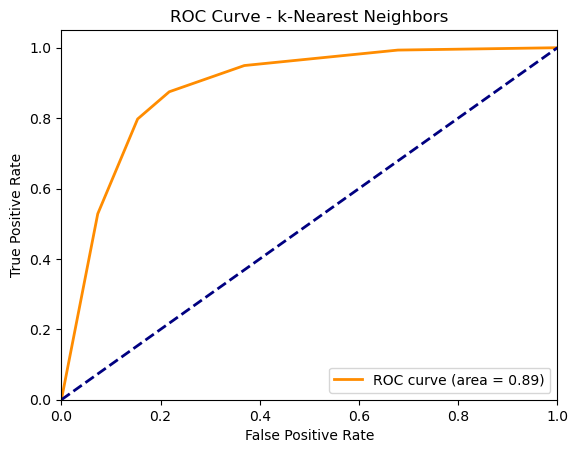

--------------------------------------------------

Training and evaluating Deep Neural Network (PyTorch)...
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.66      0.74       423
           1       0.87      0.95      0.91      1047

    accuracy                           0.86      1470
   macro avg       0.85      0.80      0.82      1470
weighted avg       0.86      0.86      0.86      1470

--------------------------------------------------



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Load your dataset (replace 'Group2_Ready.csv' with your actual file path)
data = pd.read_csv('Group2_Ready.csv')

# Encode gender column
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Create a dictionary to map locations to numerical values
location_mapping = {location: index + 1 for index, location in enumerate(data['location'].unique())}

# Apply the mapping to the 'location' column
data['location_encoded'] = data['location'].map(location_mapping)

# Decode 'Class' column
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Churn=No' else 0)

# Select features and target
features = ['partner', 'survey', 'dependents']
target = 'Class'

X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, probability=True)),
    ('k-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Deep Neural Network (PyTorch)', None)  # We'll create the PyTorch model later
]

# Train and evaluate classifiers
for name, clf in classifiers:
    print(f"Training and evaluating {name}...")
    
    if name == 'Deep Neural Network (PyTorch)':
        # Define a deep neural network model using PyTorch
        class DeepModel(nn.Module):
            def __init__(self):
                super(DeepModel, self).__init__()
                self.fc1 = nn.Linear(X_train_tensor.shape[1], 128)
                self.fc2 = nn.Linear(128, 64)
                self.fc3 = nn.Linear(64, 32)
                self.fc4 = nn.Linear(32, 1)
                self.sigmoid = nn.Sigmoid()

            def forward(self, x):
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = F.relu(self.fc3(x))
                x = self.sigmoid(self.fc4(x))
                return x
        
        # Instantiate the PyTorch model
        model = DeepModel()
        
        # Define loss function and optimizer
        criterion = nn.BCELoss()  # Binary Cross-Entropy loss
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        # Train the model
        num_epochs = 10
        for epoch in range(num_epochs):
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(X_train_tensor)  # Forward pass
            loss = criterion(outputs, y_train_tensor)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
        
        # Make predictions
        with torch.no_grad():
            y_pred = (model(X_test_tensor) > 0.5).float().numpy()
    else:
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
    
    # Evaluate the model/classifier
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_rep)
    
    # Generate ROC curve and calculate AUC
    if name != 'Deep Neural Network (PyTorch)':
        y_probs = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()
    
    print("--------------------------------------------------\n")

# Training deep learning model using PyTorch and generating ROC curves


In [15]:
values = [19, 271, 523, 756, 905, 968, 1257, 1466, 1641, 1861, 2106,
          2152, 2182, 2335, 2339, 2604, 2923, 3097, 3131, 3379, 3522, 4022,
          4159, 4695, 4781, 4876, 4907, 5031, 5283, 5363, 5626, 5640, 5685,
          5787, 5799, 5840, 5845, 5859, 6016, 6057, 6104, 6215, 6502, 6833,
          6897, 6974, 7207, 7226, 7291]


In [16]:
print(data['Class'][values])


19      0
271     0
523     0
756     0
905     0
968     0
1257    0
1466    0
1641    0
1861    0
2106    0
2152    0
2182    0
2335    0
2339    0
2604    0
2923    0
3097    0
3131    0
3379    0
3522    0
4022    0
4159    0
4695    0
4781    0
4876    0
4907    0
5031    0
5283    0
5363    0
5626    0
5640    0
5685    0
5787    0
5799    0
5840    0
5845    0
5859    0
6016    0
6057    0
6104    0
6215    0
6502    0
6833    0
6897    0
6974    0
7207    0
7226    0
7291    0
Name: Class, dtype: int64
